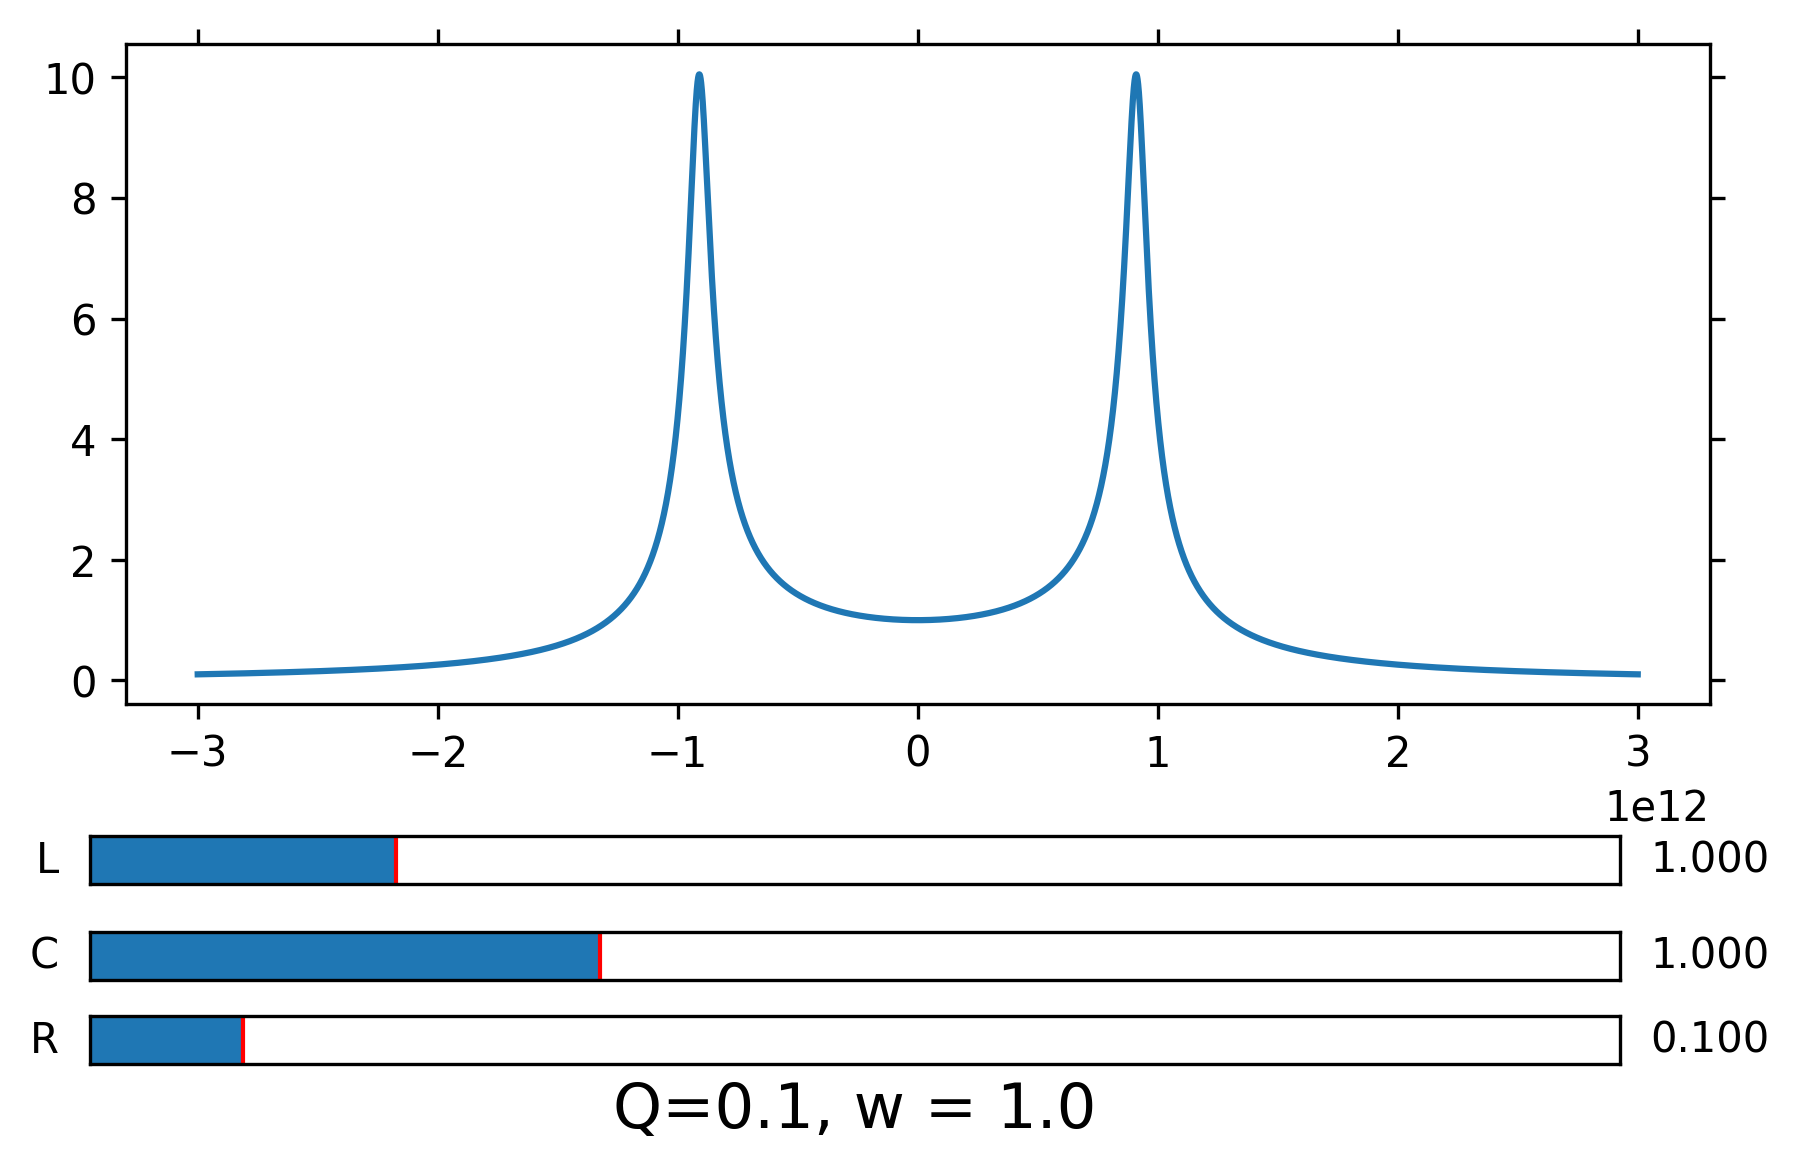

In [5]:
import numpy as np

import matplotlib.pyplot as plt

# !!! Импортируем класс кнопки и слайдера
from matplotlib.widgets import TextBox, Slider

# I_norm = 0.125 mA
L_norm = 2.64*10**(-12)
C_norm = 455*10**(-15)
R_norm = 2.4


def gauss(l, c, r, w):
    '''Отображаемая фукнция K(w)'''
    return 1/np.sqrt((1-l*c*L_norm*C_norm*w**2)**2 + (w*c*r*C_norm*R_norm)**2)


if __name__ == '__main__':
    def updateGraph():
        '''Обработчик события для кнопки "Добавить"'''
        # !!! Будем использовать sigma и mu, установленные с помощью слайдеров
        global slider_L
        global slider_R
        global slider_C
        global slider_Q

        global graph_axes

        # !!! Используем атрибут val, чтобы получить значение слайдеров
        l = slider_L.val
        r = slider_R.val
        c = slider_C.val
        I_norm = 0.125*10**(-3)

        Q = R_norm * C_norm / np.sqrt(L_norm * C_norm) * r*c/np.sqrt(l*c)
        Omega = np.sqrt(2.07*10**(-15)*C_norm*c/(2*np.pi*I_norm)) * 1/np.sqrt(L_norm*C_norm * c*l)

        G = np.sqrt(2.07*10**(-15)/(2*np.pi*I_norm*R_norm*C_norm*c))
        x = np.arange(-3.0*10**12, 3.0*10**12, 10**7)
        y = gauss(l, c, r, x)


        graph_axes.clear()

        graph_axes.plot(x, y)

        plt.xlabel(f'Q={np.round(Q,2)}, w = {np.round(Omega,2)}',fontsize=15)

        plt.draw()

    def onChangeValue(value):
        '''!!! Обработчик события изменения значений слайдеров'''
        updateGraph()

    # Создадим окно с графиком
    fig, graph_axes = plt.subplots(dpi=300)
    graph_axes.grid()

    # Оставим снизу от графика место для виджетов
    fig.subplots_adjust(left=0.07, right=0.95, top=0.95, bottom=0.4)


    # !!! L
    axes_slider_L = plt.axes([0.05, 0.25, 0.85, 0.04])
    slider_L = Slider(axes_slider_L,
                          label='L',
                          valmin=0.0,
                          valmax=5.0,
                          valinit=1.0,
                          valfmt='%1.3f')
    slider_L.on_changed(onChangeValue)

    # !!! C
    axes_slider_C = plt.axes([0.05, 0.17, 0.85, 0.04])
    slider_C = Slider(axes_slider_C,
                          label='C',
                          valmin=0.0,
                          valmax=3.0,
                          valinit=1.0,
                          valfmt='%1.3f')
    slider_C.on_changed(onChangeValue)

    # !!! R
    axes_slider_R = plt.axes([0.05, 0.10, 0.85, 0.04])
    slider_R = Slider(axes_slider_R,
                          label='R',
                          valmin=0.0,
                          valmax=1.0,
                          valinit=0.1,
                          valfmt='%1.3f')
    slider_R.on_changed(onChangeValue)


    updateGraph()
    plt.savefig('graphics/Trans_function.jpg')
    plt.show()
    